In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

from main_simple_lib import *
from vision_processes import clear_all_consumers, instantiate_consumer
print("imports done")

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


2024-11-07 09:33:36.772927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-07 09:33:36.901572: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 09:33:39.114313: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/guests/elias.wohlgemuth/miniconda3/envs/viperexl2/lib/python3.10/site-packages/cv

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading model: ./pretrained_models/CodeLlama-13B-it-exl2/4.0bpw/


imports done

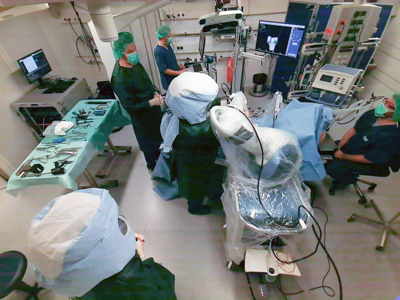

  0 def execute_command(image) -> str:                                                                             
  1     image_patch = ImagePatch(image)                                                                            
  2     person_patches = image_patch.find('person')                                                                
  3     return len(person_patches)                                                                                 

In [2]:
## SAMPLE 1 - people counting
image_name = 'camera04_colorimage-004664.jpg'
im = load_image(f'data/OR-multimodal/images/colorimage/{image_name}')
query = 'How many people are there?'
show_single_image(im)

# generate the code
code = get_code(query)

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

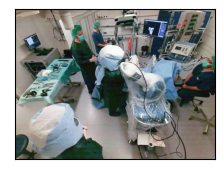

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

person_patches[0] =

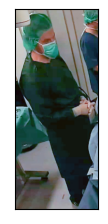

person_patches[1] =

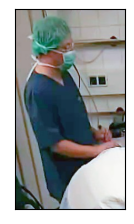

person_patches[2] =

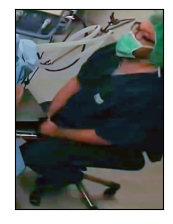

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

len(person_patches) = 3

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = 3

3

In [3]:
# execute the code
execute_code(code, (im, image_name), show_intermediate_steps=True, visualize=True)

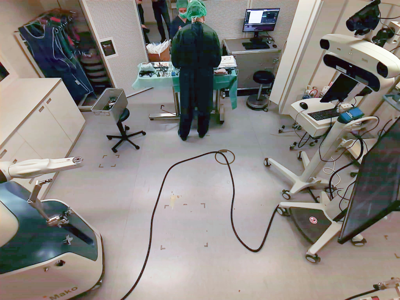

  0 def execute_command(image) -> str:                                                                             
  1     image_patch = ImagePatch(image)                                                                            
  2     nurse_patches = image_patch.find('nurse')                                                                  
  3     instrument_table_patches = image_patch.find('instrument table')                                            
  4     if len(nurse_patches) == 0 or len(instrument_table_patches) == 0:                                          
  5         return image_patch.simple_query('Is the nurse doing something with the instrument table?')             
  6     nurse_patch = nurse_patches[0]                                                                             
  7     instrument_table_patch = instrument_table_patches[0]                                                       
  8     union_patch = image_patch.crop(min(nurse_patch.left, instrument_table_patch.left), min(nurse_patch.lower,  
    instrument_table_patch.lower), max(nurse_patch.right, instrument_table_patch.right), max(nurse_patch.upper,    
    instrument_table_patch.upper))                                                                                 
  9     return union_patch.simple_query('Is the nurse doing something with the instrument table?')                 

In [4]:
# SAMPLE 2 - relation detection
image_name = 'camera01_colorimage-001387.jpg'
im = load_image(f'data/OR-multimodal/images/colorimage/{image_name}')
query = 'Is the nurse doing something with the instrument table?'
show_single_image(im)

# generate the code
code = get_code(query)

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

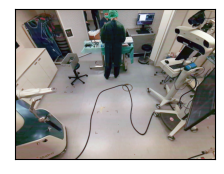

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

nurse_patches[0] =

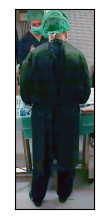

nurse_patches[1] =

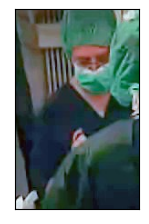

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

instrument_table_patches[0] =

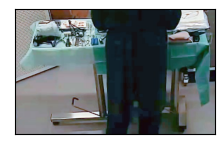

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

len(nurse_patches) = 2

0 or len(instrument_table_patches) = 1

0 = 0

len(nurse_patches) == 0 or len(instrument_table_patches) == 0 = False

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

nurse_patch =

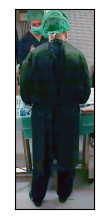

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

instrument_table_patch =

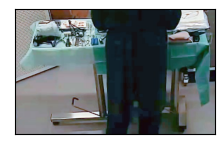

───────────────────────────────────────────────────── Line 8 ──────────────────────────────────────────────────────

union_patch =

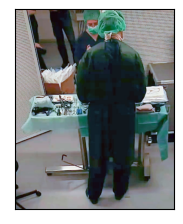

───────────────────────────────────────────────────── Line 9 ──────────────────────────────────────────────────────

union_patch.simple_query('Is the nurse doing something with the instrument table?') =  Yes, the nurse is standing 
at the instrument table, which is likely being used to prepare instruments for the knee replacement surgery.

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result =  Yes, the nurse is standing at the instrument table, which is likely being used to prepare instruments for
the knee replacement surgery.

' Yes, the nurse is standing at the instrument table, which is likely being used to prepare instruments for the knee replacement surgery. '

In [5]:
# execute the code
execute_code(code, (im, image_name), show_intermediate_steps=True, visualize=True)

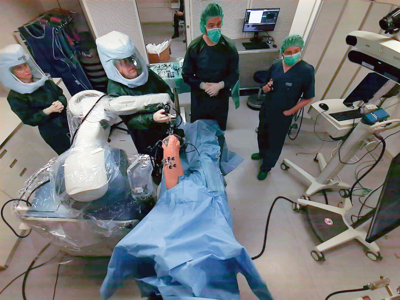

  0 def execute_command(image) -> str:                                                                             
  1     image_patch = ImagePatch(image)                                                                            
  2     return image_patch.get_operation_phase()                                                                   

In [6]:
# SAMPLE 3 - operation phase detection
image_name = 'camera01_colorimage-004287.jpg'
im = load_image(f'data/OR-multimodal/images/colorimage/{image_name}')
query = 'What is the current operation phase?'
show_single_image(im)

# generate the code
code = get_code(query)

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

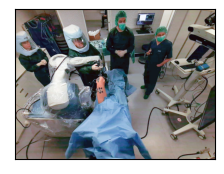

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

image_patch.get_operation_phase() = Intra-OP Knochenvorbereitung

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = Intra-OP Knochenvorbereitung

'Intra-OP Knochenvorbereitung'

In [7]:
# execute the code
execute_code(code, (im, image_name), show_intermediate_steps=True, visualize=True)

In [8]:
# NOTE for audio identification the intended solution requires using BLIP-2 instead of LLaVA, because of BLIP-2's answering style of questions with only yes/no
clear_all_consumers()
consumers = [('exllamav2', {'model_id': 'CodeLlama-13B-it-exl2/4.0bpw/', 'max_new_tokens': 400}),
             'clap',
             'blip',
             'glip']

for consumer in consumers:
    if isinstance(consumer, tuple):
        consumer_type, kwargs = consumer
        instantiate_consumer(consumer_type, **kwargs)
    else:
        instantiate_consumer(consumer)


Loading model: ./pretrained_models/CodeLlama-13B-it-exl2/4.0bpw/


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


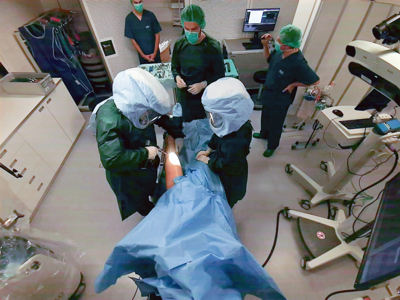

  0 def execute_command(image) -> str:                                                                             
  1     image_patch = ImagePatch(image)                                                                            
  2     sound_detected = image_patch.analyse_audio('drilling')                                                     
  3     if sound_detected:                                                                                         
  4         head_surgeon_drilling = image_patch.simple_query('Is the head surgeon drilling the patient?')          
  5         assistant_surgeon_drilling = image_patch.simple_query('Is the assistant surgeon drilling the patient?')
  6         if head_surgeon_drilling == 'yes' or assistant_surgeon_drilling == 'yes':                              
  7             return 'yes'                                                                                       
  8     return 'no'                                                                                                

In [9]:
# SAMPLE 4 - audio detection
image_name = 'camera01_colorimage-003393.jpg'
im = load_image(f'data/OR-multimodal/images/colorimage/{image_name}')
query = 'Is there drilling going on?'
show_single_image(im)

# generate the code
code = get_code(query)

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

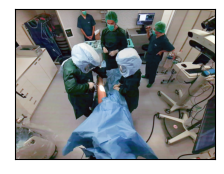

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

sound_detected = True

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

sound_detected = True

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

head_surgeon_drilling = no

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

assistant_surgeon_drilling = yes

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

head_surgeon_drilling = no

'yes' or assistant_surgeon_drilling = yes

"yes" = yes

head_surgeon_drilling == 'yes' or assistant_surgeon_drilling == 'yes' = True

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

"yes" = yes

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = yes

'yes'

In [10]:
# execute the code
execute_code(code, (im, image_name), show_intermediate_steps=True, visualize=True)